# Notebook to export reference data

### Import

In [1]:
import ROOT
import numpy as np
import time
import math
from math import exp
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import choices
import random
from scipy import optimize
from scipy.optimize import fmin
from scipy.stats import poisson

Welcome to JupyROOT 6.22/08


### Set maximum number of tracks and maximum number of colissions 

In [2]:
'Note that the computing time is linear in Tracks but non linear in N'
Tracks = 2000
N = 1000

### Importan functions

In [3]:
'Func(x) is the pdf returning the probability of "x" Tracks'
def func(x):
    Value = exp(-0.272581-1.933719*x)+exp(-2.107228-0.198227*x)
    return(Value)

'Use func(x) to calculate the discrete probabilities corresponding to a number of tracks.'
'number = array of number of tracks (0,1,2,3,4,....); weights = probability corresponding to (0,1,2,3,4,..) tracks'
number = []
weights = []
for i in range(Tracks):
    number.append(i)
    weights.append(func(i))
weights = np.array(weights)
weights = weights/np.sum(weights)

### Creating the reference data

In [4]:
#just time
Tic = time.time()
'Track list is a 2D array. Each inner array corresponds to the probability of (for element tracklist[N])'
'N+1 colission points'
Track_list = [weights]#set first element for 1 colission
b = weights # for N colissions this is the probability for N-1 (here N ist 2 -> 2-1=1 -> prob given by weights)

for l in range(1,N):#loop over the colissions starting by 1 +1 up to N
    c = [0] * Tracks #create empty array fpr prob for 1+l colission points
    for i in range(Tracks):
        for k in range(i+1):
            c[i] += weights[k] * b[i-k] #loop over all possibilities for i+1 tracks out of l+1 colissions
    b = c # overwrite b for next loop
    Track_list.append(b) # add the new probability
#just time
Toc = time.time()
print(Toc-Tic)

1360.2371308803558


### Check if Data makes sense

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


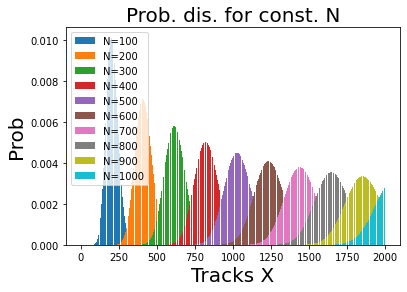

49.20996022224426 s


In [5]:
tic = time.time()
x_list = list(range(Tracks))
plt.bar(x_list,Track_list[round(0.1*N)-1],label = "N=" + str(round(0.1*N)))
plt.bar(x_list,Track_list[round(0.2*N)-1],label = "N=" + str(round(0.2*N)))
plt.bar(x_list,Track_list[round(0.3*N)-1],label = "N=" + str(round(0.3*N)))
plt.bar(x_list,Track_list[round(0.4*N)-1],label = "N=" + str(round(0.4*N)))
plt.bar(x_list,Track_list[round(0.5*N)-1],label = "N=" + str(round(0.5*N)))
plt.bar(x_list,Track_list[round(0.6*N)-1],label = "N=" + str(round(0.6*N)))
plt.bar(x_list,Track_list[round(0.7*N)-1],label = "N=" + str(round(0.7*N)))
plt.bar(x_list,Track_list[round(0.8*N)-1],label = "N=" + str(round(0.8*N)))
plt.bar(x_list,Track_list[round(0.9*N)-1],label = "N=" + str(round(0.9*N)))
plt.bar(x_list,Track_list[N-1],label = "N=" + str(N))
plt.xlabel('Tracks X',fontsize=20)
plt.ylabel('Prob',fontsize=20)
plt.title("Prob. dis. for const. N",fontsize=20) 
plt.legend()
plt.rcParams["figure.figsize"] = (9,9)
plt.show()
#plt.savefig("Constant_N_dis.pdf")
toc = time.time()
print(str(toc-tic)+" s")

### Export Data

In [6]:
Export_Name = "Reference_Data_Numpy_"+ str(Tracks) +"_Tracks_"+ str(N) +"_Colissions.txt"
np.savetxt (Export_Name, Track_list)
print("The Data was exported, name: " + Export_Name)

The Data was exported, name: Reference_Data_Numpy_2000_Tracks_1000_Colissions.txt
